# Exploration
You will explore as you would in other projects, and you will add these new ways using clustering.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from preprocessing import split_data
from acquire import acquire_data
from prepare import prepare_data
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = prepare_data()
train, validate, test = split_data(df)
train.head()

,bathroomcnt,bedroomcnt,house_size,latitude,longitude,lotsize,regionidcity,regionidzip,actual_value,logerror,age,tax_rate,estimated,LA,Orange,Ventura
39903,2.0,4.0,1498.0,33991186.0,-117827282.0,8032.0,24384,96505,312264.0,-0.023107,46.0,1.218741,296084.211495,1,0,0
25501,2.5,3.0,1729.0,33584421.0,-117644775.0,5400.0,12773,96996,479202.0,0.017473,25.0,1.007404,498874.336287,0,1,0
22151,3.0,4.0,2824.0,34261050.0,-118567605.0,17507.0,12447,96346,552275.0,0.028148,49.0,1.253571,589255.063927,1,0,0
21858,2.0,4.0,1464.0,34268048.0,-118679847.0,5400.0,27110,97116,190998.0,0.030073,46.0,1.267217,204692.353491,0,0,1
8498,2.0,3.0,1648.0,33719549.0,-117816405.0,6000.0,27491,97016,273462.0,-0.003746,49.0,1.239426,271113.476791,0,1,0


## Cluster the Target Variable
Why? By reducing the noise of the continuous variable, we can possibly see trends easier by turning this continuous variable into clusters and then comparing those clusters with respect to other variables through visualizations or tests.

Perform clustering with logerror as the only feature used in the clustering algorithm. Decide on a number of clusters to use, and store the cluster predictions back onto your data frame as cluster_target. Look at the centroids that were produced in this process. What do they tell you?

Use the produced clusters to help you explore through visualization how logerror relates to other variables. (A common way to do this is to use color to indicate the cluster id, and the other variables can be your x-axis and y-axis. (hint: look at your swarmplot function)).

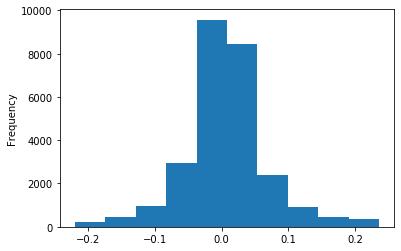

In [3]:
train.logerror.plot.hist()

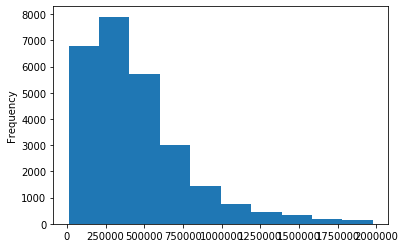

In [4]:
train.estimated.plot.hist()

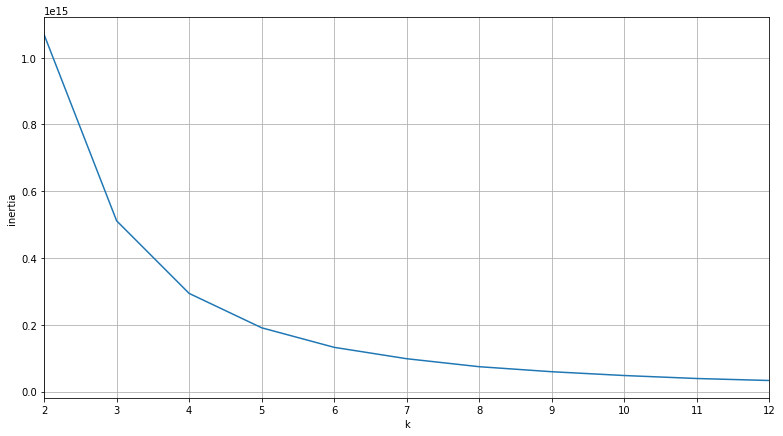

In [5]:
X = train[['estimated']]
def get_inertia(k):
    kmeans = KMeans(k)
    kmeans.fit(X)
    return kmeans.inertia_

plt.figure(figsize=(13, 7))
pd.Series({k: get_inertia(k) for k in range(2, 13)}).plot()
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

From above k = 4 looks like a good elbow point

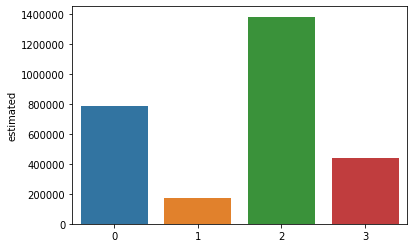

In [6]:
k =4
X = train[['estimated']]
kmeans = KMeans(k, random_state = 123)
kmeans.fit(X)
center = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
sns.barplot(x = center.index, y = center.estimated)

Assign cluster to the train data set, and create dummy variable

In [7]:
train['cluster'] = kmeans.predict(train[['estimated']])
train.cluster = 'cluster ' + train.cluster.astype(str)
cluster_df = pd.get_dummies(train.cluster)
# concatenate the dataframe with the 4 cluster columns to the original dataframe
train= pd.concat([train, cluster_df], axis =1)
# drop 
#train = train.drop(columns = ['cluster'])
train.head()

,bathroomcnt,bedroomcnt,house_size,latitude,longitude,lotsize,regionidcity,regionidzip,actual_value,logerror,...,tax_rate,estimated,LA,Orange,Ventura,cluster,cluster 0,cluster 1,cluster 2,cluster 3
39903,2.0,4.0,1498.0,33991186.0,-117827282.0,8032.0,24384,96505,312264.0,-0.023107,...,1.218741,296084.211495,1,0,0,cluster 1,0,1,0,0
25501,2.5,3.0,1729.0,33584421.0,-117644775.0,5400.0,12773,96996,479202.0,0.017473,...,1.007404,498874.336287,0,1,0,cluster 3,0,0,0,1
22151,3.0,4.0,2824.0,34261050.0,-118567605.0,17507.0,12447,96346,552275.0,0.028148,...,1.253571,589255.063927,1,0,0,cluster 3,0,0,0,1
21858,2.0,4.0,1464.0,34268048.0,-118679847.0,5400.0,27110,97116,190998.0,0.030073,...,1.267217,204692.353491,0,0,1,cluster 1,0,1,0,0
8498,2.0,3.0,1648.0,33719549.0,-117816405.0,6000.0,27491,97016,273462.0,-0.003746,...,1.239426,271113.476791,0,1,0,cluster 1,0,1,0,0


In [8]:
train.cluster.value_counts()

cluster 1    10790
cluster 3     9839
cluster 0     4617
cluster 2     1467
Name: cluster, dtype: int64

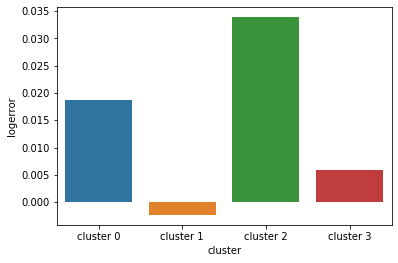

In [9]:
s = train.groupby('cluster').logerror.mean()
sns.barplot(x = s.index, y = s)

 ## Cluster Independent Variables
You should also perform some clustering based on a number of independent variables. Create and evaluate several clustering models based on subsets of the independent variables. Here are some ideas:

Location, that is, latitude and longitude
Size (finished square feet)
Location and size
Be sure to use these new clusters in exploring your data, and interpret what these clusters tell you.

Test the Significance of and Visualize Clusters
Use statistical testing methods as well as visualization to determine whether the clusters you have created are significant in terms of their relationship to logerror and/or the logerror clusters you created.

### Cluster Location

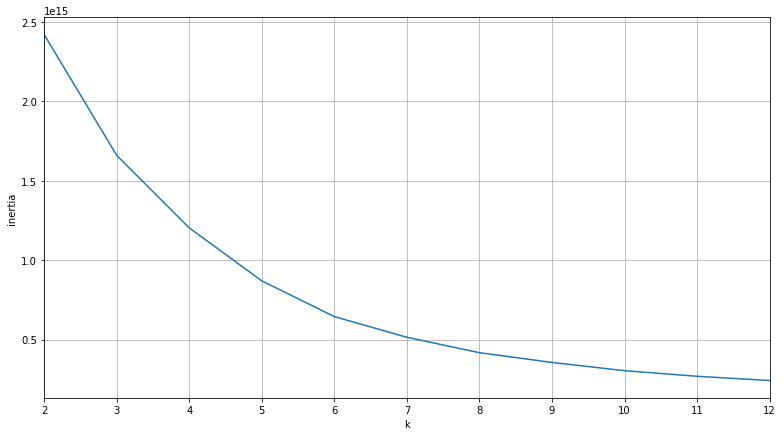

In [10]:
X = train[['latitude','longitude']]
def get_inertia(k):
    kmeans = KMeans(k, random_state = 123)
    kmeans.fit(X)
    return kmeans.inertia_

plt.figure(figsize=(13, 7))
pd.Series({k: get_inertia(k) for k in range(2, 13)}).plot()
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

K=6 looks like the elbow point

<Figure size 936x576 with 0 Axes>

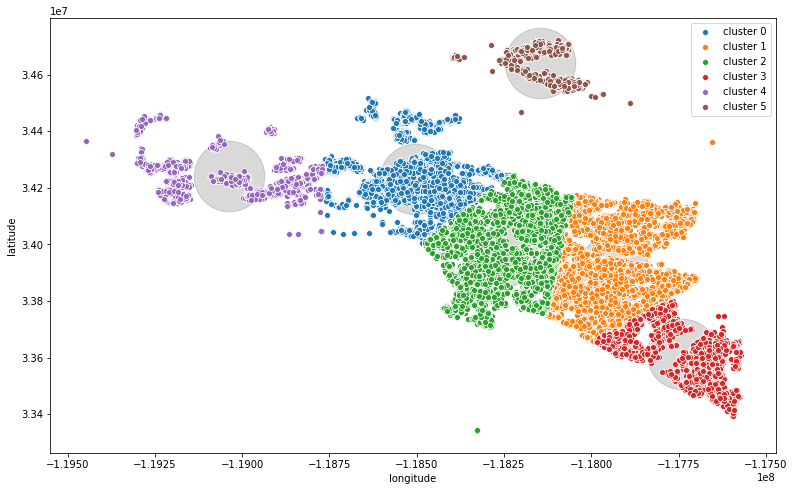

<Figure size 936x576 with 0 Axes>

In [11]:
plt.figure(figsize = (13,8))
k =6
X = train[['latitude','longitude']]
kmeans = KMeans(k, random_state = 123)
kmeans.fit(X)
train['cluster'] = kmeans.predict(train[['latitude','longitude']])
train.cluster = 'cluster ' + train.cluster.astype(str)
center = pd.DataFrame(kmeans.cluster_centers_,  columns=X.columns)
center
plt.scatter(x = center.longitude, y = center.latitude, 
            alpha=.15, s=5000, c='black')

for cluster, subset in train.groupby('cluster'):
    sns.scatterplot(subset.longitude, subset.latitude, label=cluster)
plt.legend()
plt.figure(figsize = (13,8))

### Cluster size

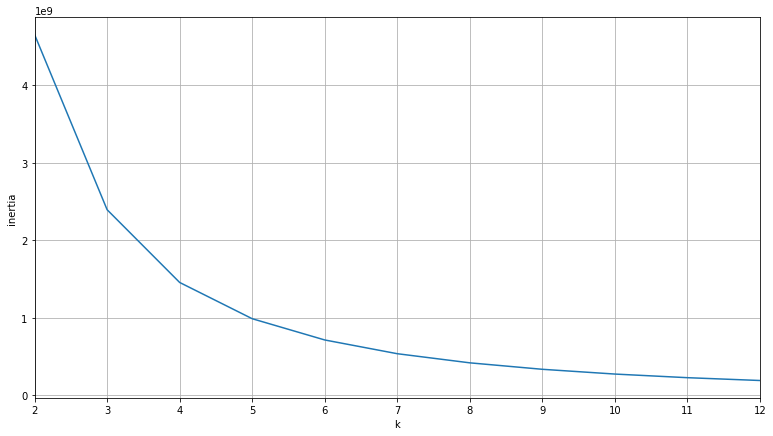

In [12]:
X = train[['house_size']]
def get_inertia(k):
    kmeans = KMeans(k, random_state = 123)
    kmeans.fit(X)
    return kmeans.inertia_

plt.figure(figsize=(13, 7))
pd.Series({k: get_inertia(k) for k in range(2, 13)}).plot()
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

Looks like K =4 is the elbow point